In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter

In [2]:
df = pd.read_csv("C:/Users/50272/AI/Praktikum/Modul 3/test.csv")

13

In [3]:
df

,Penumpang_id,Asal,Sleeper_Plus,Kabin,Tujuan,Umur,VIP,Servis_Kamar_Tambahan,Belanja_Makanan,Belanja_Merchandise,Spa,Bioskop,Nama
0,7388_01,Lampung,True,G/1198/S,Aceh,17.0,False,0.0,0.0,0.0,0.0,0.0,Sterry Mclardson
1,7390_01,Lampung,False,G/1190/P,Bali,62.0,False,240.0,0.0,0.0,586.0,10.0,Isa Wiggs
2,7391_01,Lampung,True,G/1191/P,Bali,32.0,False,0.0,0.0,0.0,NaN,0.0,Joycey Coffmaney
3,7392_01,Lampung,True,G/1192/P,Bali,37.0,False,0.0,0.0,0.0,0.0,0.0,Floyde Holton
4,7393_01,Lampung,False,E/478/P,NaN,40.0,False,0.0,0.0,0.0,7.0,782.0,Coracy Barks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,9276_01,Jakarta,False,A/98/P,Sangatta,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther
1735,9278_01,Lampung,True,G/1499/S,Aceh,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley
1736,9279_01,Lampung,False,G/1500/S,Bali,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon
1737,9280_01,Jakarta,False,E/608/S,Sangatta,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre


In [3]:
umur_mean = df["Umur"].mean()

df["Umur"].fillna(umur_mean, inplace=True)

In [4]:
df.drop(columns="Nama", inplace=True)

In [5]:
df["Sleeper_Plus"].bfill(inplace=True)
df["Asal"].bfill(inplace=True)
df["Tujuan"].bfill(inplace=True)

In [6]:
mean_spa = df["Spa"].mean()
mean_b = df["Bioskop"].mean()

df["Spa"].fillna(mean_spa, inplace=True)
df["Bioskop"].fillna(mean_b, inplace=True)

In [7]:
df.isnull().sum()

Penumpang_id              0
Asal                      0
Sleeper_Plus              0
Kabin                    37
Tujuan                    0
Umur                      0
VIP                      45
Servis_Kamar_Tambahan    31
Belanja_Makanan          30
Belanja_Merchandise      40
Spa                       0
Bioskop                   0
dtype: int64

In [8]:
mean_service = df["Servis_Kamar_Tambahan"].mean()
mean_food = df["Belanja_Makanan"].mean()
mean_merch = df["Belanja_Merchandise"].mean()

df["Servis_Kamar_Tambahan"].fillna(mean_service, inplace=True)
df["Belanja_Makanan"].fillna(mean_food, inplace=True)
df["Belanja_Merchandise"].fillna(mean_merch, inplace=True)

In [9]:
list(df)

['Penumpang_id',
 'Asal',
 'Sleeper_Plus',
 'Kabin',
 'Tujuan',
 'Umur',
 'VIP',
 'Servis_Kamar_Tambahan',
 'Belanja_Makanan',
 'Belanja_Merchandise',
 'Spa',
 'Bioskop']

In [10]:
mean_service = df["Servis_Kamar_Tambahan"].mean()
mean_food = df["Belanja_Makanan"].mean()
mean_merch = df["Belanja_Merchandise"].mean()

df["Servis_Kamar_Tambahan"].fillna(mean_service, inplace=True)
df["Belanja_Makanan"].fillna(mean_food, inplace=True)
df["Belanja_Merchandise"].fillna(mean_merch, inplace=True)

In [11]:
df.isnull().sum()

Penumpang_id              0
Asal                      0
Sleeper_Plus              0
Kabin                    37
Tujuan                    0
Umur                      0
VIP                      45
Servis_Kamar_Tambahan     0
Belanja_Makanan           0
Belanja_Merchandise       0
Spa                       0
Bioskop                   0
dtype: int64

In [12]:
df["VIP"].ffill(inplace=True)

In [13]:
df.isnull().sum()

Penumpang_id              0
Asal                      0
Sleeper_Plus              0
Kabin                    37
Tujuan                    0
Umur                      0
VIP                       0
Servis_Kamar_Tambahan     0
Belanja_Makanan           0
Belanja_Merchandise       0
Spa                       0
Bioskop                   0
dtype: int64

<Axes: >

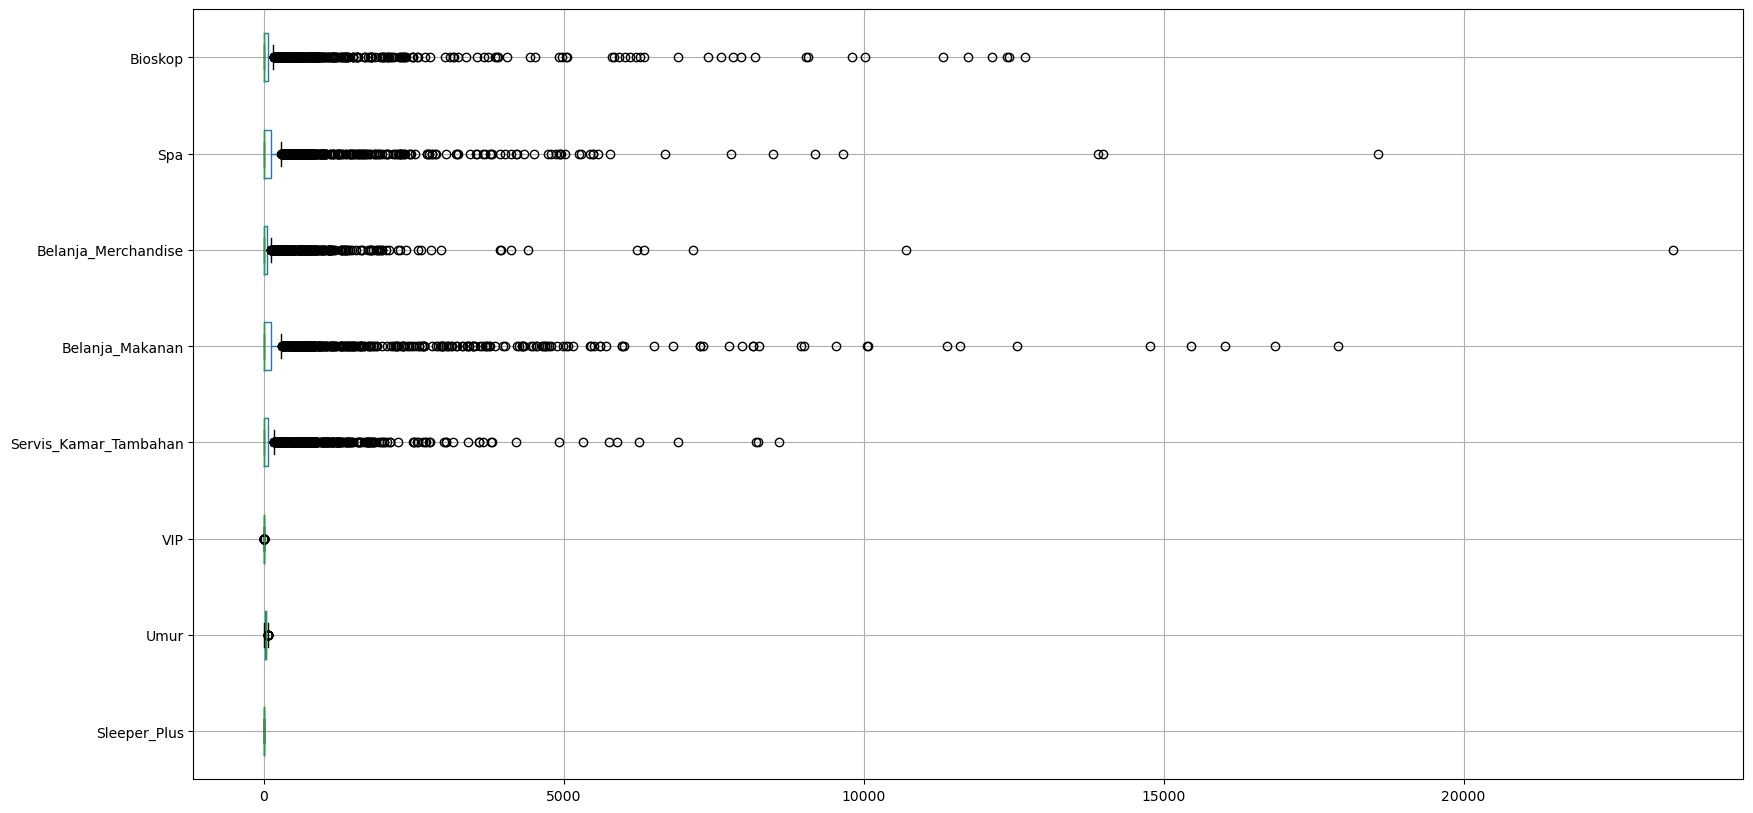

In [14]:
# Cari outlier

plt.figure(figsize=(20,10))
df.boxplot(vert=False)

In [15]:
# Ganti outlier belanja makanan
upper_bound = df['Belanja_Makanan'].quantile(0.75) + 1.5 * (df['Belanja_Makanan'].quantile(0.75) - df['Belanja_Makanan'].quantile(0.25))
lower_bound = df['Belanja_Makanan'].quantile(0.25) - 1.5 * (df['Belanja_Makanan'].quantile(0.75) - df['Belanja_Makanan'].quantile(0.25))
is_outlier = (df['Belanja_Makanan'] < lower_bound) | (df['Belanja_Makanan'] > upper_bound)

df.loc[is_outlier, 'Belanja_Makanan'] = df['Belanja_Makanan'].ffill()

# Ganti outlier belanja merch
upper_bound = df['Belanja_Merchandise'].quantile(0.75) + 1.5 * (df['Belanja_Merchandise'].quantile(0.75) - df['Belanja_Merchandise'].quantile(0.25))
lower_bound = df['Belanja_Merchandise'].quantile(0.25) - 1.5 * (df['Belanja_Merchandise'].quantile(0.75) - df['Belanja_Merchandise'].quantile(0.25))
is_outlier = (df['Belanja_Merchandise'] < lower_bound) | (df['Belanja_Merchandise'] > upper_bound)

df.loc[is_outlier, 'Belanja_Merchandise'] = df['Belanja_Merchandise'].ffill()

# Ganti outlier spa
upper_bound = df['Spa'].quantile(0.75) + 1.5 * (df['Spa'].quantile(0.75) - df['Spa'].quantile(0.25))
lower_bound = df['Spa'].quantile(0.25) - 1.5 * (df['Spa'].quantile(0.75) - df['Spa'].quantile(0.25))
is_outlier = (df['Spa'] < lower_bound) | (df['Spa'] > upper_bound)

df.loc[is_outlier, 'Spa'] = df['Spa'].ffill()


<Axes: >

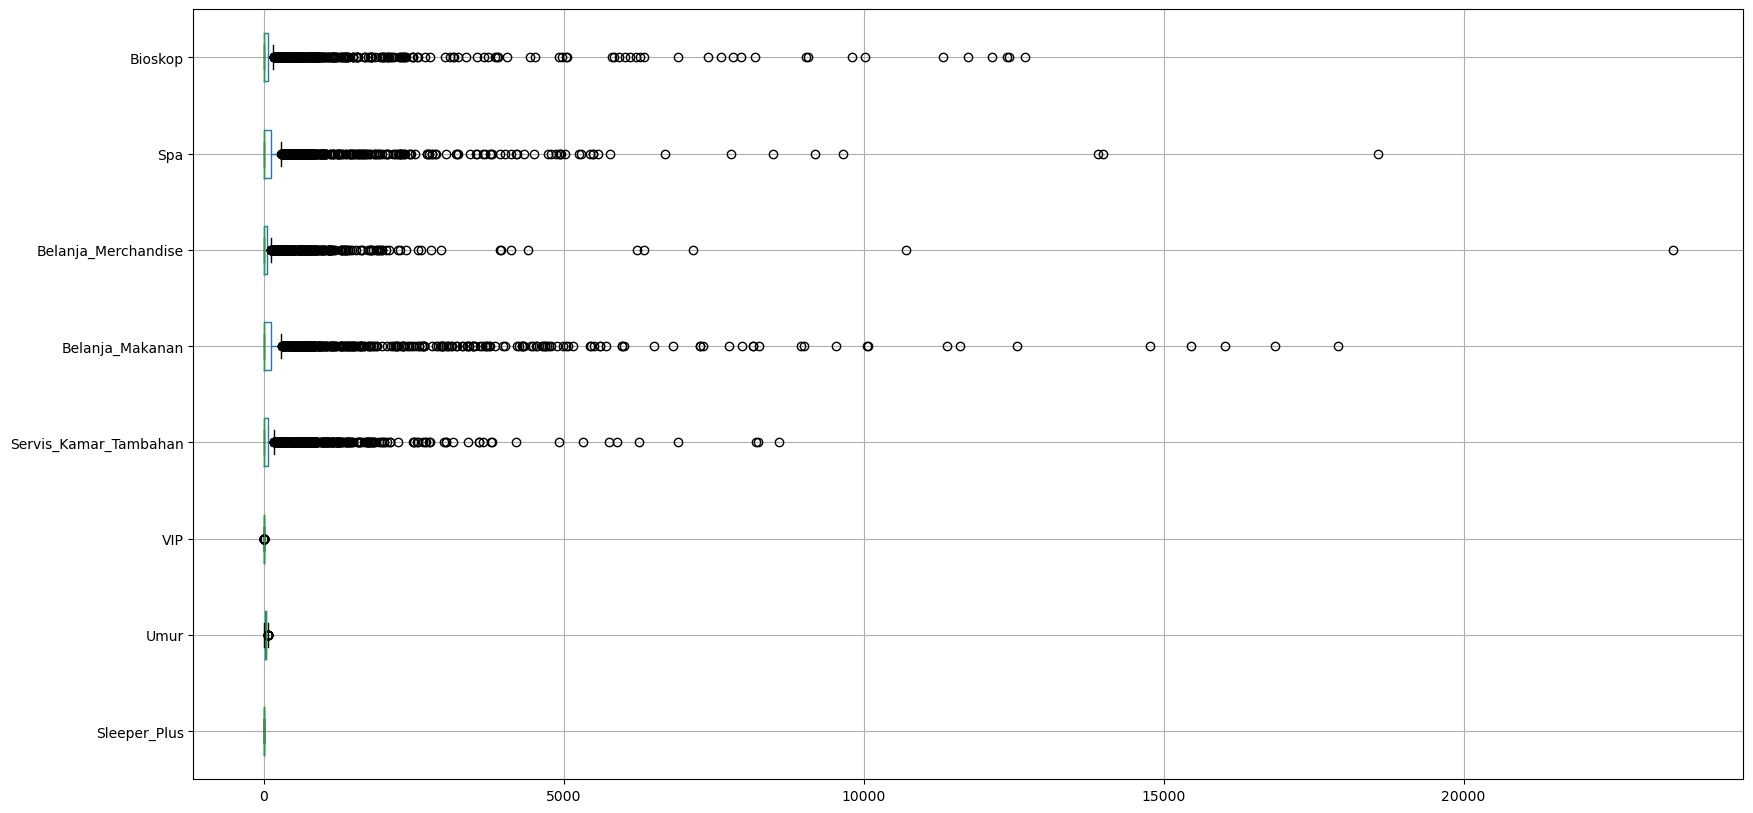

In [16]:
plt.figure(figsize=(20,10))
df.boxplot(vert=False)

In [17]:
list(df["Asal"])

['Lampung',
 'Lampung',
 'Lampung',
 'Lampung',
 'Lampung',
 'Lampung',
 'Jakarta',
 'Jakarta',
 'Jakarta',
 'Jakarta',
 'Jakarta',
 'Jakarta',
 'Jakarta',
 'Lampung',
 'Lampung',
 'Banten',
 'Jakarta',
 'Jakarta',
 'Lampung',
 'Lampung',
 'Lampung',
 'Banten',
 'Lampung',
 'Lampung',
 'Jakarta',
 'Banten',
 'Lampung',
 'Lampung',
 'Lampung',
 'Lampung',
 'Lampung',
 'Banten',
 'Jakarta',
 'Banten',
 'Lampung',
 'Jakarta',
 'Jakarta',
 'Jakarta',
 'Lampung',
 'Jakarta',
 'Jakarta',
 'Jakarta',
 'Lampung',
 'Lampung',
 'Lampung',
 'Lampung',
 'Lampung',
 'Lampung',
 'Banten',
 'Lampung',
 'Lampung',
 'Lampung',
 'Jakarta',
 'Jakarta',
 'Jakarta',
 'Jakarta',
 'Jakarta',
 'Lampung',
 'Banten',
 'Lampung',
 'Jakarta',
 'Lampung',
 'Jakarta',
 'Lampung',
 'Lampung',
 'Banten',
 'Banten',
 'Banten',
 'Lampung',
 'Jakarta',
 'Banten',
 'Lampung',
 'Banten',
 'Lampung',
 'Jakarta',
 'Lampung',
 'Lampung',
 'Banten',
 'Banten',
 'Lampung',
 'Banten',
 'Lampung',
 'Banten',
 'Jakarta',
 'Banten

In [19]:
!pip install scikit-learn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [20]:
ohc = OneHotEncoder()

encoded_from = ohc.fit_transform(df[['Asal']]).toarray()

In [21]:
df_encoded = pd.DataFrame(encoded_from, columns=ohc.get_feature_names_out(['Asal']))

df = pd.concat([df.reset_index(), df_encoded], axis=1)

In [22]:
df.reset_index(drop=True, inplace=True)

df.drop(columns=['index', 'Asal'], inplace=True)

In [23]:
df.head()

,Penumpang_id,Sleeper_Plus,Kabin,Tujuan,Umur,VIP,Servis_Kamar_Tambahan,Belanja_Makanan,Belanja_Merchandise,Spa,Bioskop,Asal_Banten,Asal_Jakarta,Asal_Lampung
0,7388_01,True,G/1198/S,Aceh,17.0,False,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
1,7390_01,False,G/1190/P,Bali,62.0,False,240.0,0.0,0.0,586.000000,10.0,0.0,0.0,1.0
2,7391_01,True,G/1191/P,Bali,32.0,False,0.0,0.0,0.0,303.814924,0.0,0.0,0.0,1.0
3,7392_01,True,G/1192/P,Bali,37.0,False,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
4,7393_01,False,E/478/P,Sangatta,40.0,False,0.0,0.0,0.0,7.000000,782.0,0.0,0.0,1.0


In [24]:
encoded_to = ohc.fit_transform(df[['Tujuan']]).toarray()

df_encoded = pd.DataFrame(encoded_to, columns=ohc.get_feature_names_out(['Tujuan']))

df = pd.concat([df.reset_index(), df_encoded], axis=1)

df.reset_index(drop=True, inplace=True)

df.drop(columns=['index', 'Tujuan'], inplace=True)

In [25]:
df.head()

,Penumpang_id,Sleeper_Plus,Kabin,Umur,VIP,Servis_Kamar_Tambahan,Belanja_Makanan,Belanja_Merchandise,Spa,Bioskop,Asal_Banten,Asal_Jakarta,Asal_Lampung,Tujuan_Aceh,Tujuan_Bali,Tujuan_Sangatta
0,7388_01,True,G/1198/S,17.0,False,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,7390_01,False,G/1190/P,62.0,False,240.0,0.0,0.0,586.000000,10.0,0.0,0.0,1.0,0.0,1.0,0.0
2,7391_01,True,G/1191/P,32.0,False,0.0,0.0,0.0,303.814924,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,7392_01,True,G/1192/P,37.0,False,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,7393_01,False,E/478/P,40.0,False,0.0,0.0,0.0,7.000000,782.0,0.0,0.0,1.0,0.0,0.0,1.0


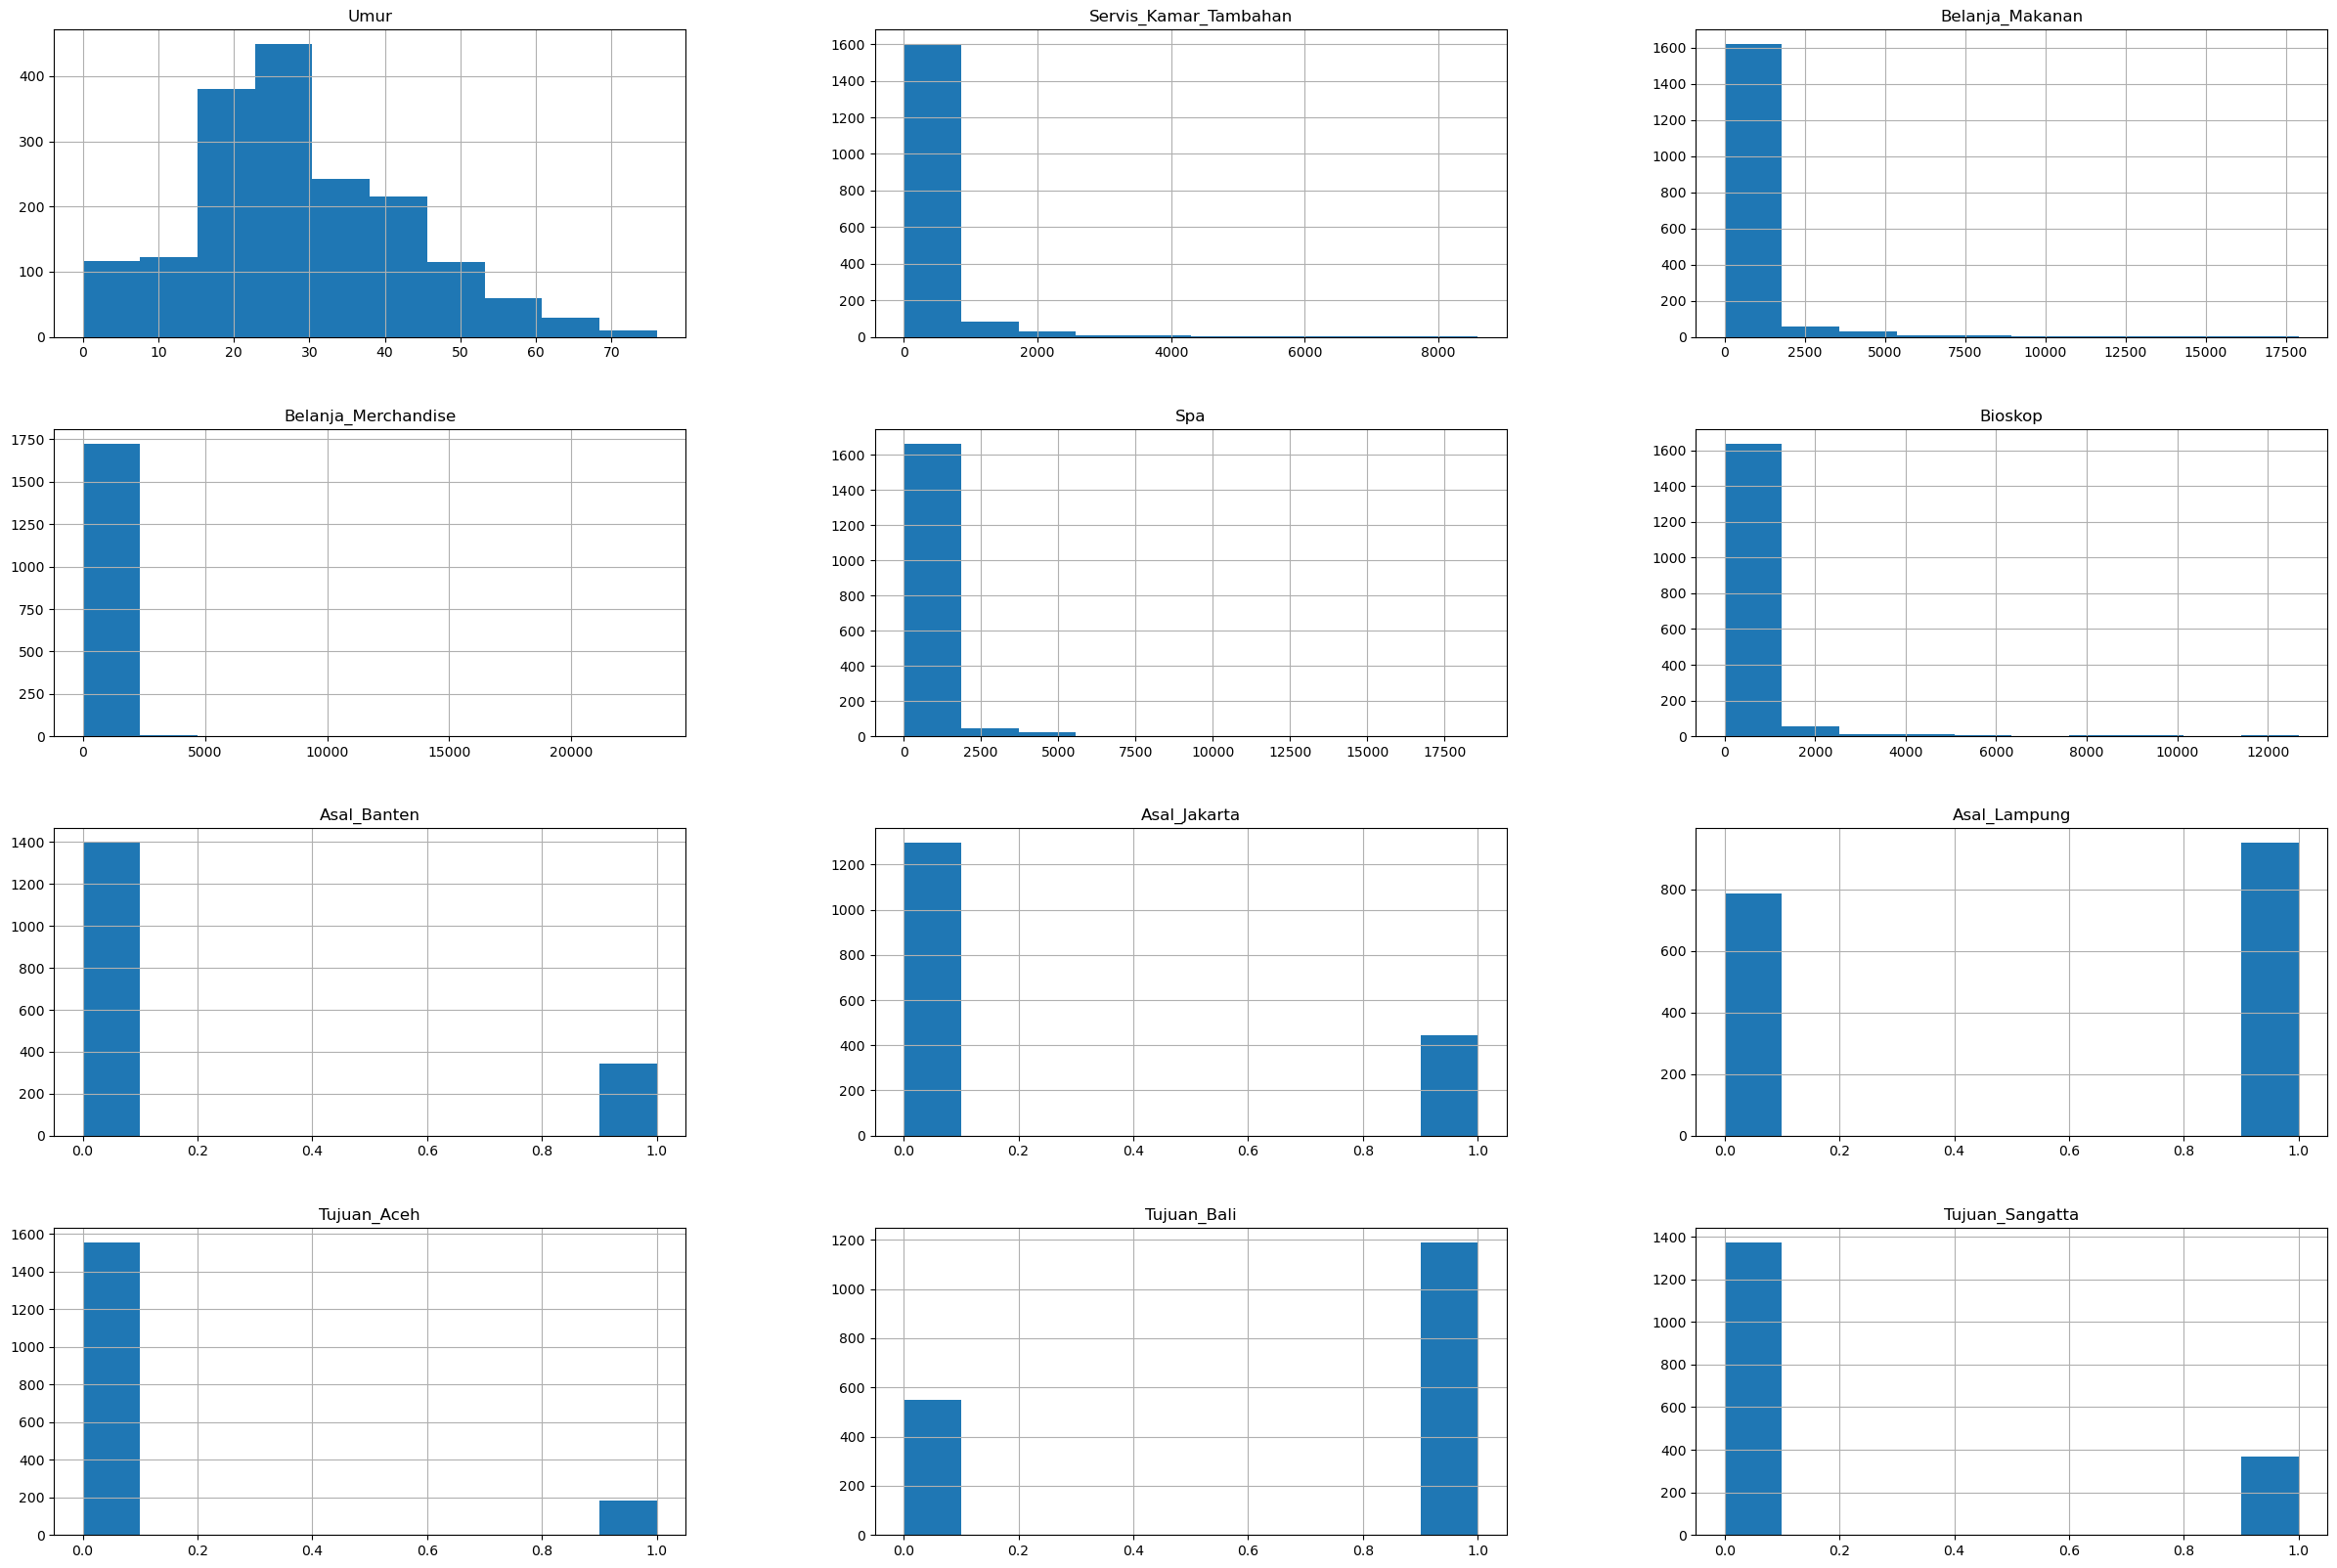

In [26]:
df.hist(figsize=(30, 20), bins=10)
plt.show()

In [27]:
list(df['Kabin'])

['G/1198/S',
 'G/1190/P',
 'G/1191/P',
 'G/1192/P',
 'E/478/P',
 'G/1193/P',
 'B/277/S',
 'B/277/S',
 'B/277/S',
 'B/277/S',
 'C/271/S',
 'C/271/S',
 'C/271/S',
 'F/1531/P',
 'F/1418/S',
 'E/479/P',
 'C/272/S',
 'C/272/S',
 'G/1194/P',
 'F/1419/S',
 'G/1195/P',
 'F/1420/S',
 'G/1201/S',
 'F/1533/P',
 'B/278/S',
 'F/1534/P',
 'G/1197/P',
 'F/1535/P',
 'G/1204/S',
 'G/1200/P',
 'G/1200/P',
 'F/1423/S',
 'A/79/P',
 nan,
 'G/1205/S',
 'A/90/S',
 'E/481/P',
 'B/244/P',
 'G/1202/P',
 'B/279/S',
 'B/279/S',
 'B/279/S',
 'E/483/P',
 'E/495/S',
 nan,
 'G/1203/P',
 'G/1208/S',
 'G/1204/P',
 'F/1539/P',
 'F/1540/P',
 'F/1541/P',
 'G/1205/P',
 'B/281/S',
 'B/281/S',
 'B/281/S',
 'C/275/S',
 'A/80/P',
 'G/1210/S',
 'E/496/S',
 'G/1211/S',
 'B/282/S',
 'F/1543/P',
 'D/223/S',
 'G/1206/P',
 'G/1207/P',
 'F/1426/S',
 'F/1545/P',
 'F/1545/P',
 'F/1546/P',
 'C/276/S',
 'F/1429/S',
 'G/1215/S',
 'E/485/P',
 'G/1209/P',
 nan,
 'G/1210/P',
 'G/1216/S',
 'E/486/P',
 'E/486/P',
 'G/1217/S',
 'D/224/S',
 'E/4

In [28]:
df.drop(columns=["Kabin"], inplace=True)

In [31]:
df.isnull().sum()

Penumpang_id             0
Sleeper_Plus             0
Umur                     0
VIP                      0
Servis_Kamar_Tambahan    0
Belanja_Makanan          0
Belanja_Merchandise      0
Spa                      0
Bioskop                  0
Asal_Banten              0
Asal_Jakarta             0
Asal_Lampung             0
Tujuan_Aceh              0
Tujuan_Bali              0
Tujuan_Sangatta          0
dtype: int64

In [ ]:
df.to_csv("processed_test.csv", index=False)

## Penjelasan

Pada preprocessing praktikum ini, saya melakuka handling missing values dengan cara bfill dan mean. Untuk kolom yang berkaitan dengan pengeluaran penumpang dan umur, digunakan mean dari kolom untuk melakukan filling missing value. Sedangkan untuk kolom lainnya digunakan ffill dan bfill. Kemudian saya melakukan one hot encoding untuk kolom asal dan tujuan, dikarenakan value pada kolom tersebut hanya memiliki 3 variasi saja dan kolom tersebut tidak memiliki tingkatan tersendiri. Peningkatan akurasi setelah saya melakukan one hot encoding. Kemudian untuk kolom yang saya drop yaitu Nama dan Kabin.  